In [95]:
# Import the numpy and pandas packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [96]:
movies = pd.read_csv('IMDB_Movies.csv')
OrgData = movies
movies



,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [97]:
#write your code here
movies.shape


(5043, 28)

In [98]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [99]:
#MISSING VALUES IN COLUMNS
movies.isnull().sum().sort_values(ascending = False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          20
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
movie_facebook_likes           0
genres                         0
movie_title                    0
num_voted_users                0
movie_imdb_link                0
imdb_score                     0
cast_total_facebook_likes      0
dtype: int64

In [100]:
#MISSING VALUES IN ROWS
movies.isnull().sum(axis = 1).sort_values(ascending = False)

279     15
4       13
4945    11
2241    11
2342    10
        ..
2708     0
2707     0
2706     0
2705     0
0        0
Length: 5043, dtype: int64

In [101]:
#column/row wise NULL PERCENTAGE
movies.isnull().sum(axis = 0).sort_values(ascending = False) / len(movies) *100

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
content_rating                6.008328
plot_keywords                 3.033908
title_year                    2.141582
director_name                 2.062265
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_name                  0.456078
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.396589
color                         0.376760
duration                      0.297442
facenumber_in_poster          0.257783
actor_2_name                  0.257783
actor_2_facebook_likes        0.257783
language                      0.237954
actor_1_name                  0.138806
actor_1_facebook_likes        0.138806
country                       0.099147
movie_facebook_likes          0.000000
genres                        0.000000
movie_title                   0.000000
num_voted_users               0.000000
movie_imdb_link          

-  ### Subtask 2.2: Drop unecessary columns

We will be analysing movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [102]:
#DROPPING UNWANTED COLUMNS
movies = movies.drop(['color',
'director_facebook_likes',
'actor_1_facebook_likes',
'actor_2_facebook_likes',
'actor_3_facebook_likes',
'actor_2_name',
'cast_total_facebook_likes',
'actor_3_name',
'duration',
'facenumber_in_poster',
'content_rating',
'country',
'movie_imdb_link',
'aspect_ratio',
'plot_keywords'], axis = 1)

In [103]:
movies.shape

(5043, 13)

-  ### Subtask 2.3: Drop unecessary rows using columns with high Null percentages

Some columns have large percentage (greater than 5%) of Null values. Drop all the rows which have Null values for such columns.

WE CANNOT REMOVE THE GROSS AND THE BUDGET BECAUSE IT HIGHLY DEPENDENTVARIABLE. INSTEAD WE CAN DO IS WHENEVER WE GET A NULL VALUE IN GROSS OR BUDGET WE REMOVE THAT ENTIRE ROW 

In [104]:

movies.isnull().sum(axis = 0).sort_values(ascending = False)/len(movies)*100

gross                     17.529248
budget                     9.756098
title_year                 2.141582
director_name              2.062265
num_critic_for_reviews     0.991473
num_user_for_reviews       0.396589
language                   0.237954
actor_1_name               0.138806
movie_facebook_likes       0.000000
imdb_score                 0.000000
num_voted_users            0.000000
movie_title                0.000000
genres                     0.000000
dtype: float64

In [105]:
movies= movies[movies.gross.notnull()]
movies= movies[movies.budget.notnull()]

In [106]:
movies.isnull().sum(axis = 0).sort_values(ascending = False)/len(movies)*100

language                  0.077101
actor_1_name              0.077101
num_critic_for_reviews    0.025700
movie_facebook_likes      0.000000
imdb_score                0.000000
title_year                0.000000
budget                    0.000000
num_user_for_reviews      0.000000
num_voted_users           0.000000
movie_title               0.000000
genres                    0.000000
gross                     0.000000
director_name             0.000000
dtype: float64

-  ### Subtask 2.4: Drop unecessary rows

Some of the rows might have greater than five NaN values. Such rows aren't of much use for the analysis and hence, should be removed.

In [107]:
# Write your code for dropping the rows here
(movies.isnull().sum(axis=1).sort_values(ascending=False) > 5).sum()

0

In [108]:
movies = movies[movies.isnull().sum(axis=1).sort_values(ascending=False) <= 5]

<ipython-input-108-fe6541a34dda>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies = movies[movies.isnull().sum(axis=1).sort_values(ascending=False) <= 5]


In [109]:
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,7000.0,2004.0,7.0,19000
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35,English,7000.0,2005.0,6.3,74
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,7000.0,1992.0,6.9,0
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,9000.0,2011.0,6.4,413


-  ### Subtask 2.5: Fill NaN values

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [110]:
movies.isnull().sum(axis=1).sort_values(ascending=False)/ len(movies)*100

4720    0.0257
4958    0.0257
3086    0.0257
4110    0.0257
4837    0.0257
         ...  
2857    0.0000
2856    0.0000
2855    0.0000
2854    0.0000
0       0.0000
Length: 3891, dtype: float64

In [111]:
movies.groupby('language').language.count()

language
Aboriginal       2
Arabic           1
Aramaic          1
Bosnian          1
Cantonese        8
Czech            1
Danish           3
Dari             2
Dutch            3
Dzongkha         1
English       3707
Filipino         1
French          37
German          13
Hebrew           3
Hindi           10
Hungarian        1
Icelandic        1
Indonesian       2
Italian          7
Japanese        12
Kazakh           1
Korean           5
Mandarin        15
Maya             1
Mongolian        1
None             1
Norwegian        4
Persian          3
Portuguese       5
Romanian         1
Russian          1
Spanish         26
Swedish          1
Telugu           1
Thai             3
Vietnamese       1
Zulu             1
Name: language, dtype: int64

In [112]:
movies.language.describe()

count        3888
unique         38
top       English
freq         3707
Name: language, dtype: object

In [113]:
movies.language = movies.language.fillna('English')

In [114]:
(movies.isnull().sum(axis=0).sort_values(ascending=False)/ len(movies)*100)

actor_1_name              0.077101
num_critic_for_reviews    0.025700
movie_facebook_likes      0.000000
imdb_score                0.000000
title_year                0.000000
budget                    0.000000
language                  0.000000
num_user_for_reviews      0.000000
num_voted_users           0.000000
movie_title               0.000000
genres                    0.000000
gross                     0.000000
director_name             0.000000
dtype: float64

-  ### Subtask 2.6: Check the number of retained rows



In [115]:
len(movies)/len(OrgData) *100

77.15645449137418

## Task 3: Data Analysis
-  ### Subtask 3.1: Change the unit of columns
Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [116]:
# Write your code for unit conversion here
movies['budget'] = movies['budget']/1000000
movies['gross'] = movies['gross']/1000000


In [117]:
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0000,2009.0,7.9,33000
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300.0000,2007.0,7.1,0
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245.0000,2015.0,6.8,85000
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.0000,2012.0,8.5,164000
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263.7000,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,0.0070,2004.0,7.0,19000
5034,Neill Dela Llana,35.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35,English,0.0070,2005.0,6.3,74
5035,Robert Rodriguez,56.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,0.0070,1992.0,6.9,0
5037,Edward Burns,14.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,0.0090,2011.0,6.4,413


-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [118]:
movies['Profit'] = movies['gross'] - movies['budget']
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0000,2009.0,7.9,33000,523.505847
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300.0000,2007.0,7.1,0,9.404152
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245.0000,2015.0,6.8,85000,-44.925825
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.0000,2012.0,8.5,164000,198.130642
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263.7000,2012.0,6.6,24000,-190.641321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,0.0070,2004.0,7.0,19000,0.417760
5034,Neill Dela Llana,35.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35,English,0.0070,2005.0,6.3,74,0.063071
5035,Robert Rodriguez,56.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,0.0070,1992.0,6.9,0,2.033920
5037,Edward Burns,14.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,0.0090,2011.0,6.4,413,-0.004416


In [119]:
movies.sort_values(by ='Profit', ascending = False)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.000000,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.000000,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.000000,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.000000,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.500000,1982.0,7.9,34000,424.449459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Katsuhiro Ôtomo,105.0,0.410388,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79,Japanese,2127.519898,2004.0,6.9,973,-2127.109510
2323,Hayao Miyazaki,174.0,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570,Japanese,2400.000000,1997.0,8.4,11000,-2397.701809
3005,Lajos Koltai,73.0,0.195888,Drama|Romance|War,Marcell Nagy,Fateless,5603,45,Hungarian,2500.000000,2005.0,7.1,607,-2499.804112
3859,Chan-wook Park,202.0,0.211667,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131,Korean,4200.000000,2005.0,7.7,4000,-4199.788333


In [120]:
#top 10 movies
top10 = movies.sort_values(by ='Profit', ascending = False).head(10)


-  ### Subtask 3.3: Drop duplicate values



In [121]:
movies.drop_duplicates(keep = 'first', inplace = True)
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0000,2009.0,7.9,33000,523.505847
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300.0000,2007.0,7.1,0,9.404152
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245.0000,2015.0,6.8,85000,-44.925825
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.0000,2012.0,8.5,164000,198.130642
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263.7000,2012.0,6.6,24000,-190.641321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,0.0070,2004.0,7.0,19000,0.417760
5034,Neill Dela Llana,35.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35,English,0.0070,2005.0,6.3,74,0.063071
5035,Robert Rodriguez,56.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,0.0070,1992.0,6.9,0,2.033920
5037,Edward Burns,14.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,0.0090,2011.0,6.4,413,-0.004416


In [122]:
top10 = movies.sort_values(by ='Profit', ascending = False).head(10)
top10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.449459
17,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,45.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597,English,115.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061
439,Gary Ross,673.0,407.999255,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959,English,78.0,2012.0,7.3,140000,329.999255


-  ### Subtask 3.4: Find IMDb Top 250

    1. Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [123]:
IMDb_Top250 = movies[movies['num_voted_users'] > 25000].sort_values(by='imdb_score', ascending = False).head(250)
IMDb_Top250


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
1937,Frank Darabont,199.0,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144,English,25.00,1994.0,9.3,108000,3.341469
3466,Francis Ford Coppola,208.0,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,6.00,1972.0,9.2,43000,128.821952
2837,Francis Ford Coppola,149.0,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650,English,13.00,1974.0,9.0,14000,44.300000
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.00,2008.0,9.0,37000,348.316061
4498,Sergio Leone,181.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1.20,1966.0,8.9,20000,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,John Carney,232.0,9.437933,Drama|Music|Romance,Glen Hansard,Once,90827,329,English,0.18,2007.0,7.9,26000,9.257933
2605,Ang Lee,287.0,128.067808,Action|Drama|Romance,Chen Chang,"Crouching Tiger, Hidden Dragon",217740,1641,Mandarin,15.00,2000.0,7.9,0,113.067808
3029,David O. Russell,410.0,93.571803,Biography|Drama|Sport,Christian Bale,The Fighter,275869,389,English,25.00,2010.0,7.9,36000,68.571803
2177,Tim Burton,111.0,56.362352,Fantasy|Romance,Johnny Depp,Edward Scissorhands,357581,588,English,20.00,1990.0,7.9,16000,36.362352


In [124]:
IMDb_Top250['rank'] = IMDb_Top250['imdb_score'].rank(method='first', ascending= False)
IMDb_Top250

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,rank
1937,Frank Darabont,199.0,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144,English,25.00,1994.0,9.3,108000,3.341469,1.0
3466,Francis Ford Coppola,208.0,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,6.00,1972.0,9.2,43000,128.821952,2.0
2837,Francis Ford Coppola,149.0,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650,English,13.00,1974.0,9.0,14000,44.300000,3.0
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.00,2008.0,9.0,37000,348.316061,4.0
4498,Sergio Leone,181.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1.20,1966.0,8.9,20000,4.900000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,John Carney,232.0,9.437933,Drama|Music|Romance,Glen Hansard,Once,90827,329,English,0.18,2007.0,7.9,26000,9.257933,246.0
2605,Ang Lee,287.0,128.067808,Action|Drama|Romance,Chen Chang,"Crouching Tiger, Hidden Dragon",217740,1641,Mandarin,15.00,2000.0,7.9,0,113.067808,247.0
3029,David O. Russell,410.0,93.571803,Biography|Drama|Sport,Christian Bale,The Fighter,275869,389,English,25.00,2010.0,7.9,36000,68.571803,248.0
2177,Tim Burton,111.0,56.362352,Fantasy|Romance,Johnny Depp,Edward Scissorhands,357581,588,English,20.00,1990.0,7.9,16000,36.362352,249.0


In [125]:
IMDb_Top250[IMDb_Top250['language'] != 'English']

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,rank
4498,Sergio Leone,181.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1.200000,1966.0,8.9,20000,4.900000,5.0
4747,Akira Kurosawa,153.0,0.269061,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596,Japanese,2.000000,1954.0,8.7,11000,-1.730939,17.0
4029,Fernando Meirelles,214.0,7.563397,Crime|Drama,Alice Braga,City of God,533200,749,Portuguese,3.300000,2002.0,8.7,28000,4.263397,20.0
2373,Hayao Miyazaki,246.0,10.049886,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902,Japanese,19.000000,2001.0,8.6,28000,-8.950114,23.0
4259,Florian Henckel von Donnersmarck,215.0,11.284657,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407,German,2.000000,2006.0,8.5,39000,9.284657,35.0
4921,Majid Majidi,46.0,0.925402,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130,Persian,0.180000,1997.0,8.5,0,0.745402,39.0
2323,Hayao Miyazaki,174.0,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570,Japanese,2400.000000,1997.0,8.4,11000,-2397.701809,47.0
2970,Wolfgang Petersen,96.0,11.433134,Adventure|Drama|Thriller|War,Jürgen Prochnow,Das Boot,168203,426,German,14.000000,1981.0,8.4,11000,-2.566866,49.0
4105,Chan-wook Park,305.0,2.181290,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809,Korean,3.000000,2003.0,8.4,43000,-0.818710,57.0
4659,Asghar Farhadi,354.0,7.098492,Drama|Mystery,Shahab Hosseini,A Separation,151812,264,Persian,0.500000,2011.0,8.4,48000,6.598492,58.0


- ### Subtask 3.5: Find the best directors

    1. Group the dataframe using the `director_name` column.
    2. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`. 

In [174]:
#for extracting the top 10 directors here
top10directors = movies.groupby('director_name').imdb_score.mean().sort_values(ascending = False).head(10)
top10director

director_name
Charles Chaplin      8.600000
Tony Kaye            8.600000
Ron Fricke           8.500000
Damien Chazelle      8.500000
Majid Majidi         8.500000
Alfred Hitchcock     8.500000
Sergio Leone         8.433333
Christopher Nolan    8.425000
Asghar Farhadi       8.400000
Richard Marquand     8.400000
Name: imdb_score, dtype: float64

-  ### Subtask 3.6: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [128]:
movies.genres

0           Action|Adventure|Fantasy|Sci-Fi
1                  Action|Adventure|Fantasy
2                 Action|Adventure|Thriller
3                           Action|Thriller
5                   Action|Adventure|Sci-Fi
                       ...                 
5033                  Drama|Sci-Fi|Thriller
5034                               Thriller
5035    Action|Crime|Drama|Romance|Thriller
5037                           Comedy|Drama
5042                            Documentary
Name: genres, Length: 3856, dtype: object

In [129]:
tempgen = movies.genres.str.split('|', expand = True).iloc[:,0:2]
tempgen.columns = ['genre_1', 'genre_2']
tempgen.genre_2.fillna(tempgen.genre_1, inplace = True)
tempgen

,genre_1,genre_2
0,Action,Adventure
1,Action,Adventure
2,Action,Adventure
3,Action,Thriller
5,Action,Adventure
...,...,...
5033,Drama,Sci-Fi
5034,Thriller,Thriller
5035,Action,Crime
5037,Comedy,Drama


In [130]:
movies = pd.concat([movies, tempgen], axis = 1)
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,genre_1,genre_2
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0000,2009.0,7.9,33000,523.505847,Action,Adventure
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300.0000,2007.0,7.1,0,9.404152,Action,Adventure
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245.0000,2015.0,6.8,85000,-44.925825,Action,Adventure
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.0000,2012.0,8.5,164000,198.130642,Action,Thriller
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263.7000,2012.0,6.6,24000,-190.641321,Action,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,0.0070,2004.0,7.0,19000,0.417760,Drama,Sci-Fi
5034,Neill Dela Llana,35.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35,English,0.0070,2005.0,6.3,74,0.063071,Thriller,Thriller
5035,Robert Rodriguez,56.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,0.0070,1992.0,6.9,0,2.033920,Action,Crime
5037,Edward Burns,14.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,0.0090,2011.0,6.4,413,-0.004416,Comedy,Drama


In [140]:
top_genre= movies.groupby(['genre_1', 'genre_2']).gross.mean().sort_values(ascending = False).head()
top_genre


genre_1    genre_2  
Family     Sci-Fi       434.949459
Adventure  Sci-Fi       228.627758
           Family       118.919540
           Animation    116.998550
Action     Adventure    109.595465
Name: gross, dtype: float64

In [132]:
movies.corr()

,num_critic_for_reviews,gross,num_voted_users,budget,title_year,imdb_score,movie_facebook_likes,Profit
num_critic_for_reviews,1.000000,0.473912,0.599613,0.106865,0.392569,0.342056,0.701892,0.039538
gross,0.473912,1.000000,0.629322,0.101023,0.044878,0.212196,0.367386,0.205882
num_voted_users,0.599613,0.629322,1.000000,0.068297,0.016738,0.473299,0.519923,0.124922
budget,0.106865,0.101023,0.068297,1.000000,0.044247,0.029399,0.053286,-0.952772
title_year,0.392569,0.044878,0.016738,0.044247,1.000000,-0.127709,0.293998,-0.029823
imdb_score,0.342056,0.212196,0.473299,0.029399,-0.127709,1.000000,0.280062,0.035856
movie_facebook_likes,0.701892,0.367386,0.519923,0.053286,0.293998,0.280062,1.000000,0.059732
Profit,0.039538,0.205882,0.124922,-0.952772,-0.029823,0.035856,0.059732,1.000000


# CORELATIONS

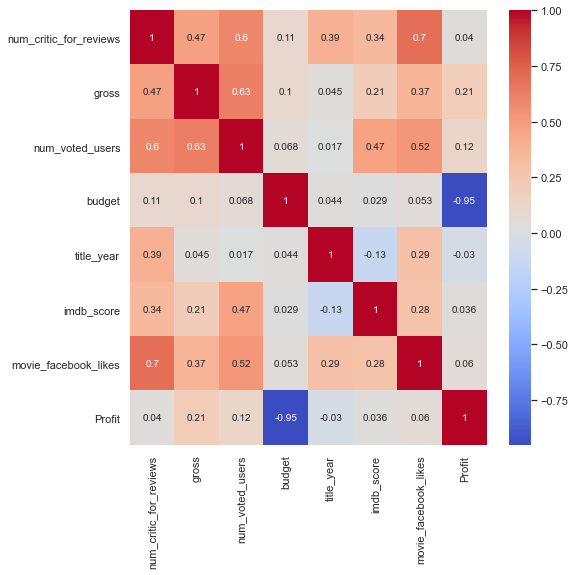

In [133]:
plt.figure(figsize = (8,8))
sns.heatmap(movies.corr(), annot = True , cmap = 'coolwarm' )

# VISUALIZING TOP 10 MOVIES W.R.T PROFIT

In [134]:
top10_movies = movies.sort_values(by ='Profit', ascending = False).head(10)
top10_movies


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,genre_1,genre_2
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847,Action,Adventure
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.177271,Action,Adventure
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302,Drama,Romance
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.935665,Action,Adventure
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.449459,Family,Sci-Fi
17,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.279547,Action,Adventure
509,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,45.0,1994.0,8.5,17000,377.783777,Adventure,Animation
240,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597,English,115.0,1999.0,6.5,13000,359.544677,Action,Adventure
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061,Action,Crime
439,Gary Ross,673.0,407.999255,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959,English,78.0,2012.0,7.3,140000,329.999255,Adventure,Drama


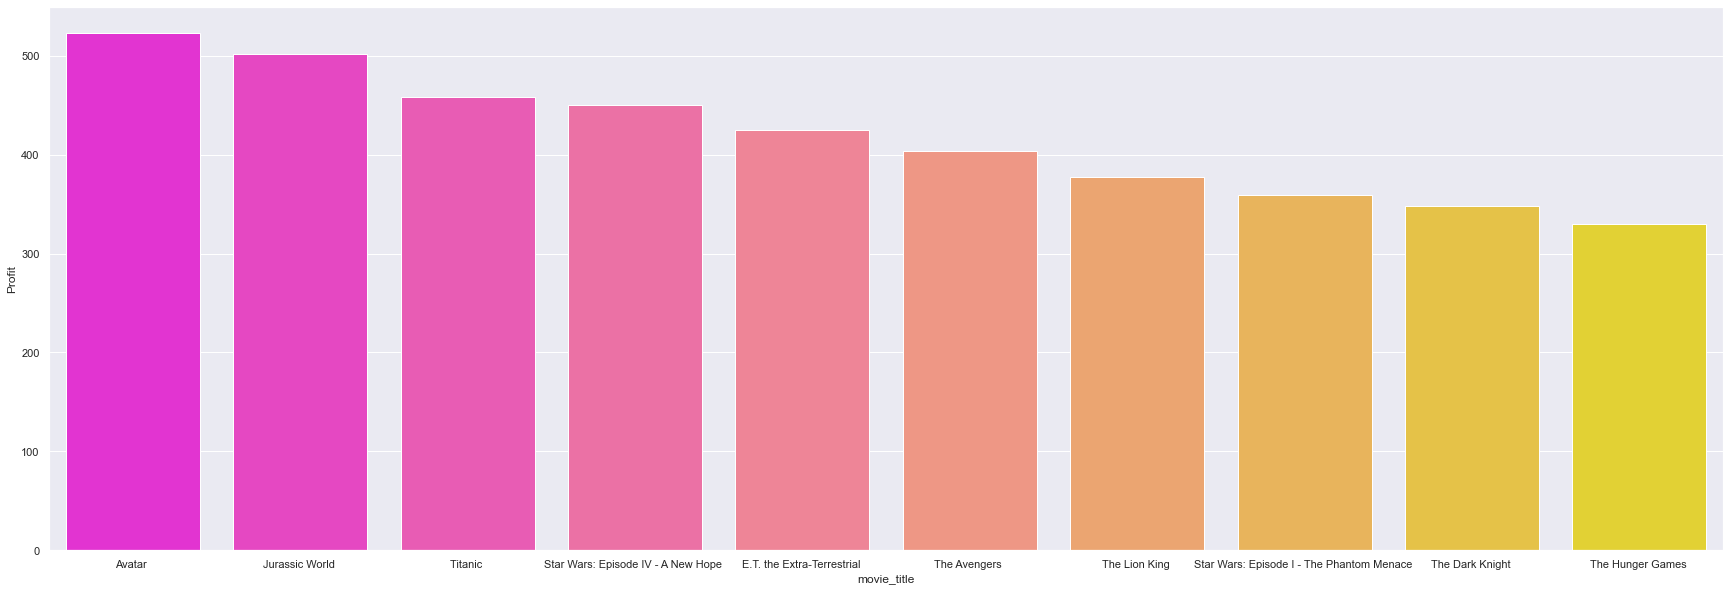

In [135]:
sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(x= 'movie_title', y ='Profit' , data= top10_movies , palette = 'spring')
plt.show()

# VISUALIZING THE TOP 10 MOVIES WRT IMDB RATING

In [143]:
IMDb_Top10 = movies[movies['num_voted_users'] > 25000].sort_values(by='imdb_score', ascending = False).head(10)
IMDb_Top10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,genre_1,genre_2
1937,Frank Darabont,199.0,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144,English,25.0,1994.0,9.3,108000,3.341469,Crime,Drama
3466,Francis Ford Coppola,208.0,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,6.0,1972.0,9.2,43000,128.821952,Crime,Drama
2837,Francis Ford Coppola,149.0,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650,English,13.0,1974.0,9.0,14000,44.300000,Crime,Drama
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061,Action,Crime
4498,Sergio Leone,181.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1.2,1966.0,8.9,20000,4.900000,Western,Western
3355,Quentin Tarantino,215.0,107.930000,Crime|Drama,Bruce Willis,Pulp Fiction,1324680,2195,English,8.0,1994.0,8.9,45000,99.930000,Crime,Drama
1874,Steven Spielberg,174.0,96.067179,Biography|Drama|History,Liam Neeson,Schindler's List,865020,1273,English,22.0,1993.0,8.9,41000,74.067179,Biography,Drama
339,Peter Jackson,328.0,377.019252,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189,English,94.0,2003.0,8.9,16000,283.019252,Action,Adventure
836,Robert Zemeckis,149.0,329.691196,Comedy|Drama,Tom Hanks,Forrest Gump,1251222,1398,English,55.0,1994.0,8.8,59000,274.691196,Comedy,Drama
97,Christopher Nolan,642.0,292.568851,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,2803,English,160.0,2010.0,8.8,175000,132.568851,Action,Adventure


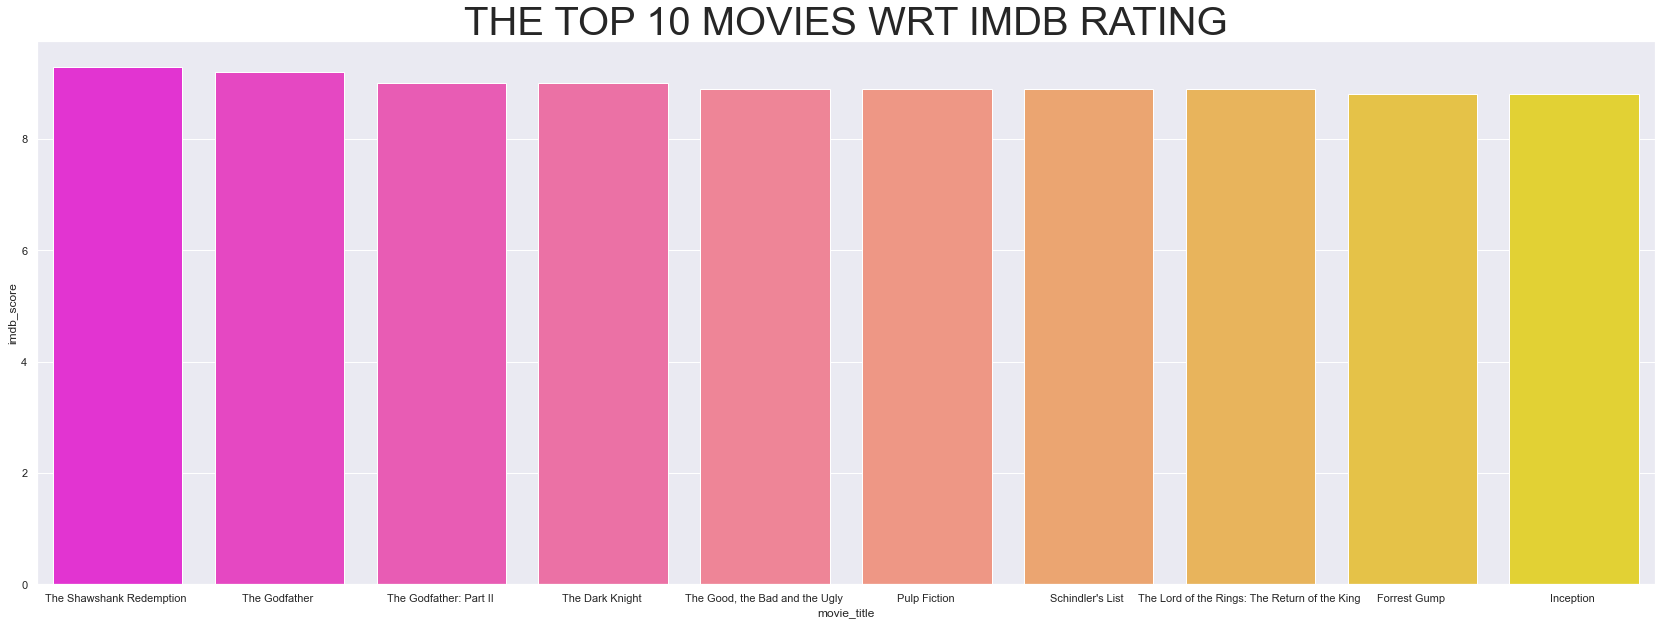

In [200]:
sns.set(rc={'figure.figsize':(29,10)})
sns.barplot(x= 'movie_title', y ='imdb_score' , data= IMDb_Top10 , palette = 'spring')
plt.title('THE TOP 10 MOVIES WRT IMDB RATING', size = 40)
plt.xlabel("MOVIE ", size = 20)
plt.ylabel("IM", size = 20)
plt.show()

# TOP 10 IMDb SCORE W.R.T NUMBER OF VOTED USERS

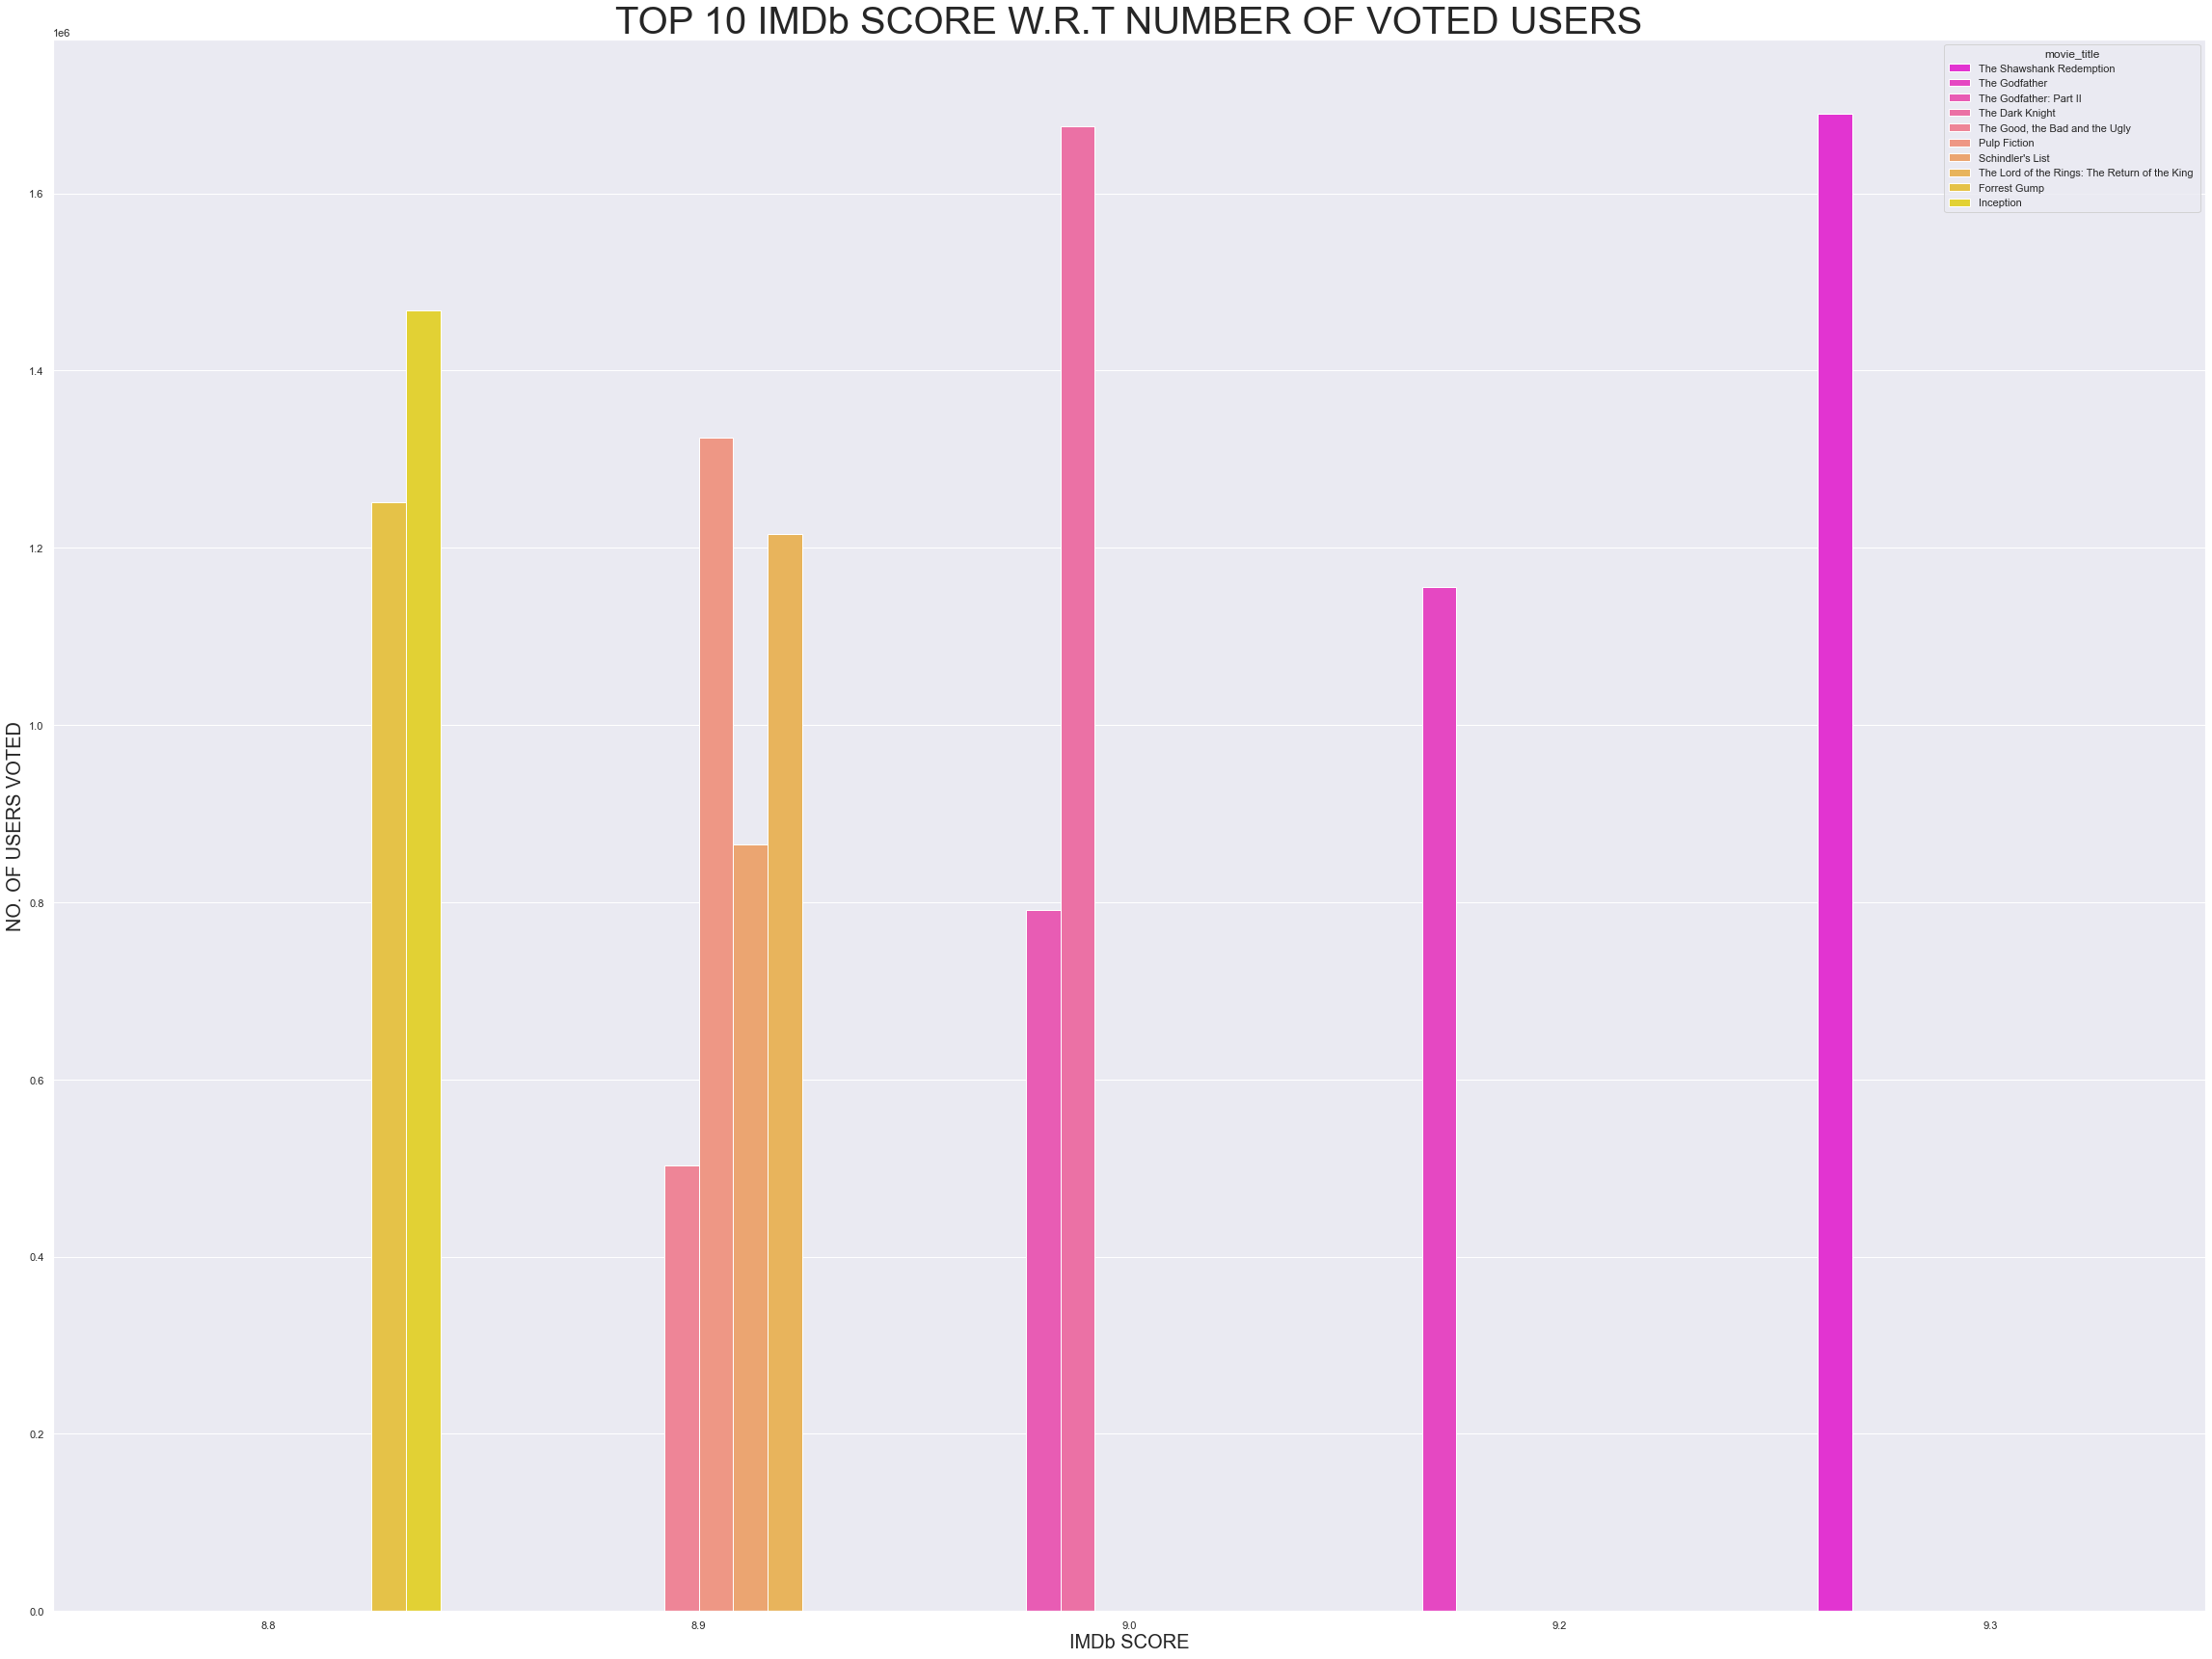

In [225]:
sns.set(rc={'figure.figsize':(40,30)})
sns.barplot(x="imdb_score",y="num_voted_users",data=IMDb_Top10,palette = 'spring', hue='movie_title')
plt.title("TOP 10 IMDb SCORE W.R.T NUMBER OF VOTED USERS", size = 40)
plt.xlabel("IMDb SCORE", size = 20)
plt.ylabel("NO. OF USERS VOTED", size = 20)
plt.show()

In [185]:
top_10_directors = pd.read_csv(r"C:\Users\Rakshit\Desktop\Python\IMDB\top_10_directors.csv")
top_10_directors


,director_name,imdb_score
0,Charles Chaplin,8.60000
1,Tony Kaye,8.60000
2,Ron Fricke,8.50000
3,Damien Chazelle,8.50000
4,Majid Majidi,8.50000
5,Alfred Hitchcock,8.50000
6,Sergio Leone,8.43333
7,Christopher Nolan,8.42500
8,Asghar Farhadi,8.40000
9,Richard Marquand,8.40000


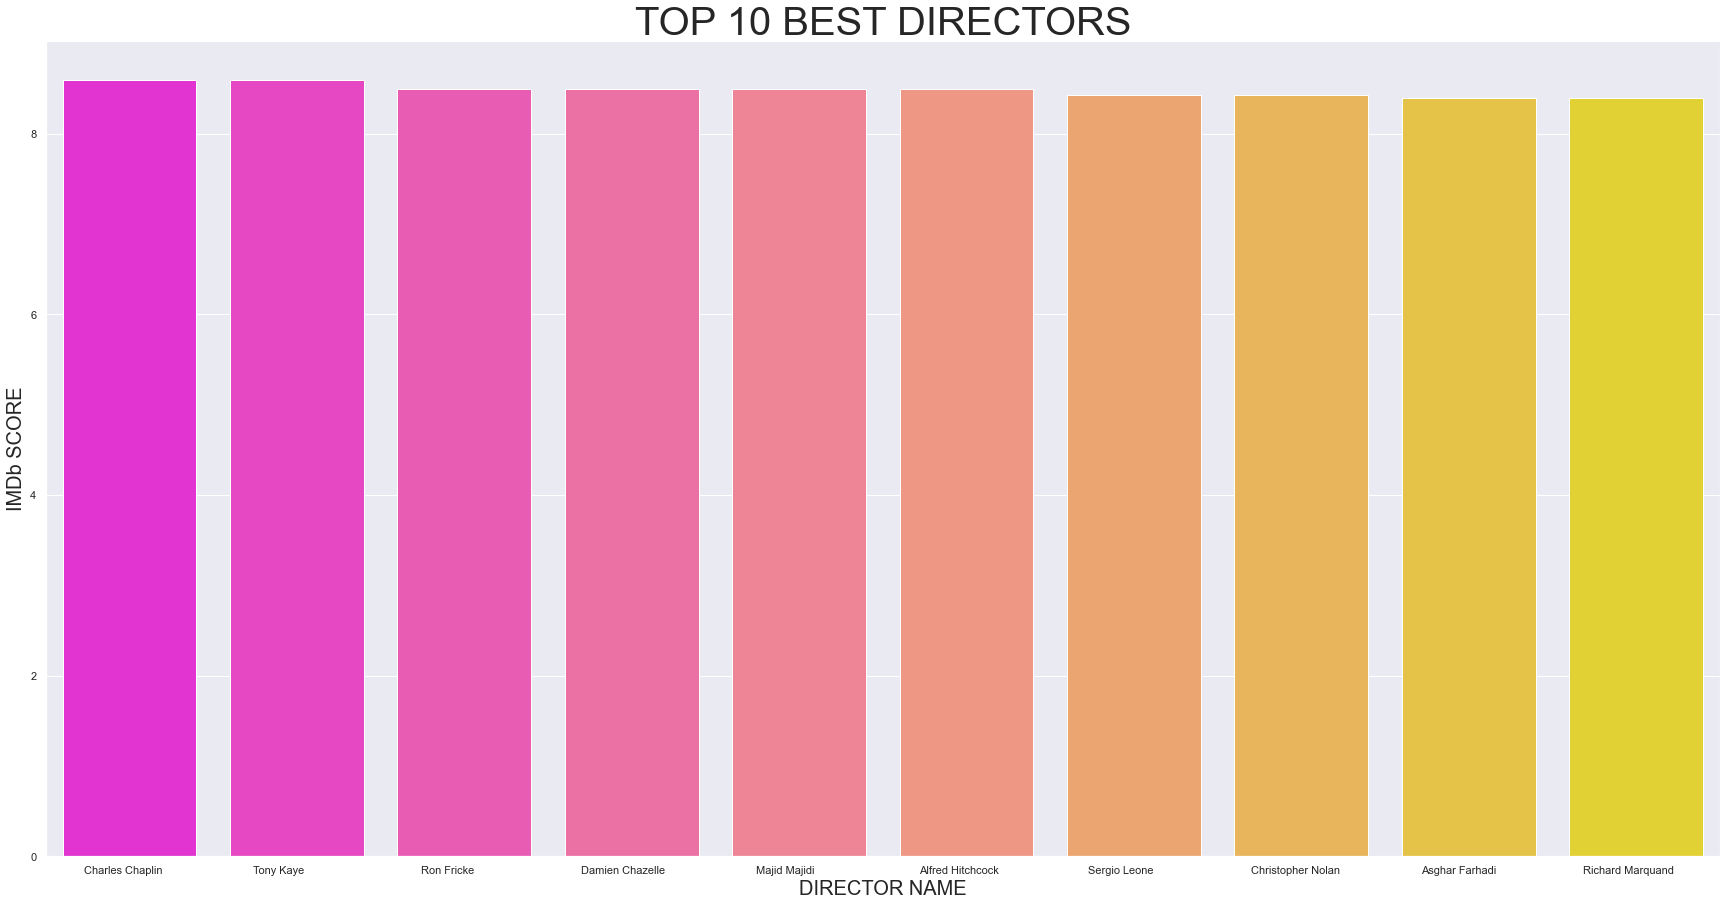

In [224]:
sns.set(rc={'figure.figsize':(30,15)})
sns.barplot(x="director_name",y="imdb_score",  data=top_10_directors,palette = 'spring')
plt.title('TOP 10 BEST DIRECTORS' , size = 40)
plt.xlabel("DIRECTOR NAME", size = 20)
plt.ylabel("IMDb SCORE", size = 20)
plt.show()

# TOP MOVIES GENRE TO MAKE MOST PROFIT

In [214]:
top_genre = pd.read_csv(r"C:\Users\Rakshit\Desktop\Python\IMDB\top_genre.csv")
top_genre.dropna(inplace =True)
top_genre

,Genres,profit
0,Family | Sci-Fi,434.949459
1,Adventure | Sci-Fi,228.627758
2,Family,118.919540
3,Animation,116.998550
4,Action | Adventure,109.595465


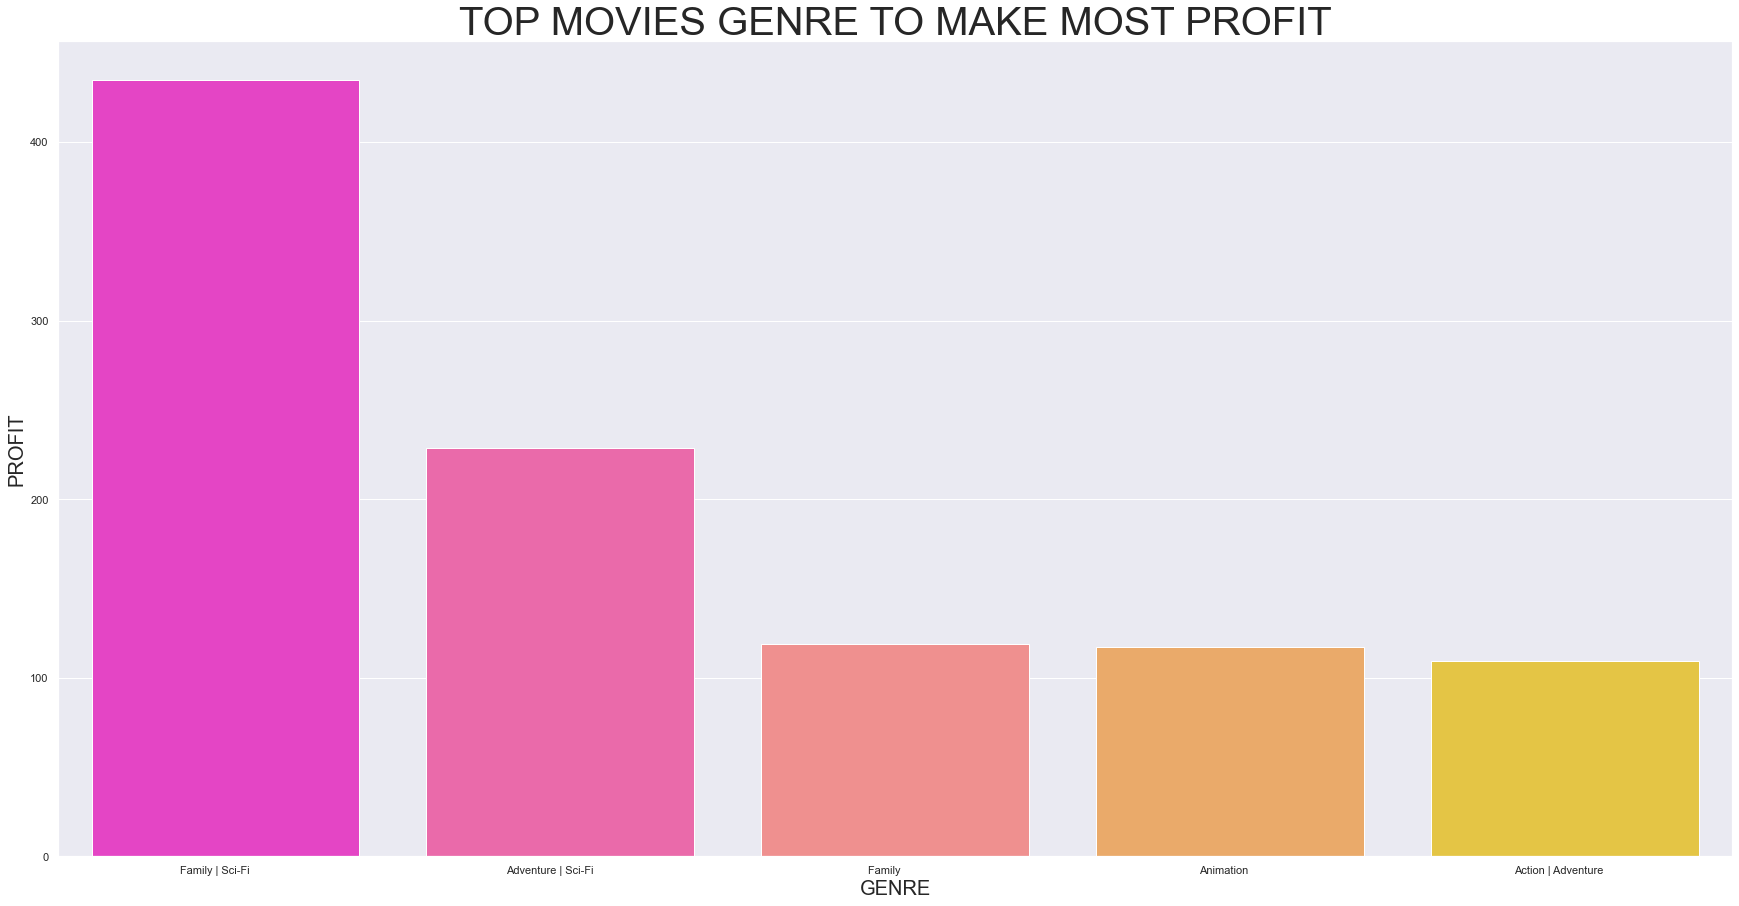

In [223]:
sns.set(rc={'figure.figsize':(30,15)})
sns.barplot(x="Genres",y="profit",  data=top_genre,palette = 'spring')
plt.title('TOP MOVIES GENRE TO MAKE MOST PROFIT' , size = 40)
plt.xlabel("GENRE", size = 20)
plt.ylabel("PROFIT", size = 20)
plt.show()